In [1]:

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
# Add the scripts directory to the Python path
sys.path.append(os.path.abspath(os.path.join("..", "scripts")))
from plot import (
    plot_histogram, 
    plot_scatter, 
    plot_time_series, 
    plot_boxplot,
    plot_correlation_matrix
)

# Now you can import the functions
from utils import (
    read_csv_file,
    calculate_summary_statistics,
    calculate_correlation_matrix,
    detect_outliers,
    convert_to_datetime,
    calculate_daily_returns,
    calculate_moving_average,
)



# Load the CSV file into a DataFrame
data_info = read_csv_file("Data/yfinance_data/GOOG_historical_data.csv")
df = data_info["data"]
print("Row count: ",data_info["row_count"])

Row count:  5020


Summary Statistics:
                                 Date         Open         High          Low  \
count                           5020  5020.000000  5020.000000  5020.000000   
mean   2014-08-07 16:36:31.553784832    45.251315    45.728793    44.800587   
min              2004-08-19 00:00:00     2.470490     2.534002     2.390042   
25%              2009-08-12 18:00:00    13.034705    13.145415    12.881592   
50%              2014-08-07 12:00:00    26.982210    27.194902    26.791387   
75%              2019-08-02 18:00:00    60.215126    60.758375    59.811811   
max              2024-07-30 00:00:00   191.750000   193.309998   190.619995   
std                              NaN    43.338635    43.818298    42.918167   

             Close    Adj Close        Volume    Dividends  Stock Splits  
count  5020.000000  5020.000000  5.020000e+03  5020.000000   5020.000000  
mean     45.274515    45.224493  1.157539e+08     0.000040      0.004583  
min       2.490913     2.488082  1.584340e

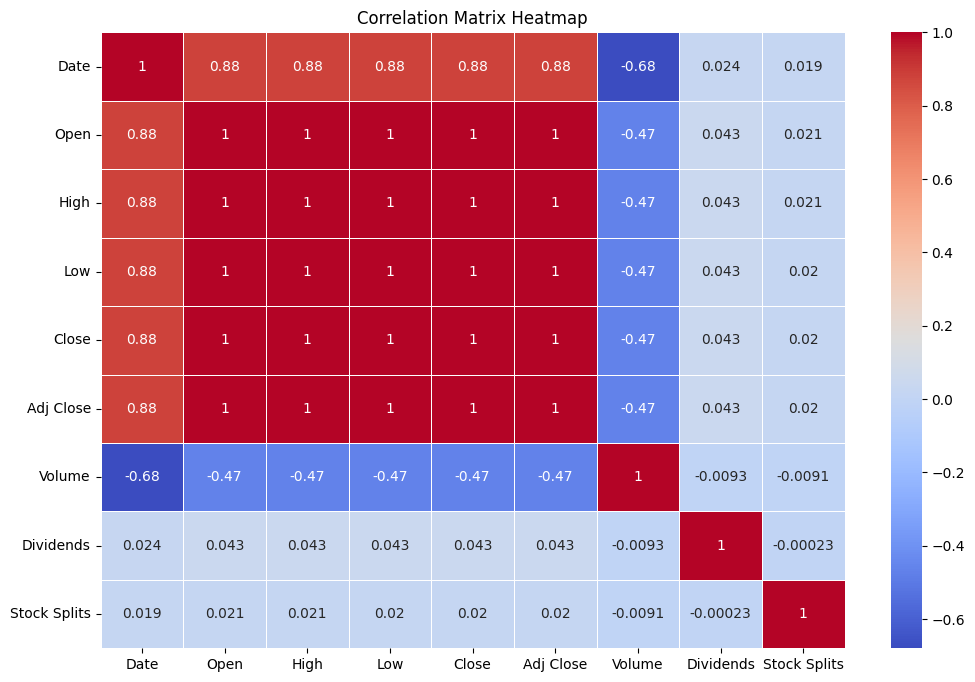

Outliers in 'Close' column:
            Date        Open        High         Low       Close   Adj Close  \
4254 2021-07-14  131.901505  132.996002  131.897995  132.082504  131.932373   
4255 2021-07-15  132.500000  132.595001  130.598007  131.266495  131.117294   
4256 2021-07-16  131.641006  132.182999  130.821503  131.845505  131.695648   
4259 2021-07-21  130.787003  132.617249  130.601501  132.600494  132.449768   
4260 2021-07-22  132.649994  133.504501  132.399994  133.328506  133.176956   
...         ...         ...         ...         ...         ...         ...   
5015 2024-07-24  175.389999  177.949997  173.570007  174.369995  174.369995   
5016 2024-07-25  174.250000  175.199997  169.050003  169.160004  169.160004   
5017 2024-07-26  168.770004  169.839996  165.865005  168.679993  168.679993   
5018 2024-07-29  170.500000  172.160004  169.720001  171.130005  171.130005   
5019 2024-07-30  171.830002  172.949997  170.119995  171.860001  171.860001   

        Volume  Divide

In [2]:
# Convert 'Date' column to datetime
data = convert_to_datetime(df, 'Date')

# Calculate summary statistics
summary_stats = calculate_summary_statistics(data)
print("Summary Statistics:\n", summary_stats)

# Calculate correlation matrix
correlation_matrix = calculate_correlation_matrix(data)
print("Correlation Matrix:\n", correlation_matrix)
plot_correlation_matrix(data)
# Detect outliers in the 'Close' column
outliers = detect_outliers(data, 'Close')
print("Outliers in 'Close' column:\n", outliers)

# Calculate daily returns for the 'Close' column
data = calculate_daily_returns(data, 'Close')
print("Daily Returns:\n", data[['Date', 'Close', 'Daily_Returns']].head())

# Calculate 20-day moving average for the 'Close' column
data = calculate_moving_average(data, 'Close', 20)
print("20-day Moving Average:\n", data[['Date', 'Close', 'MA_20']].head())

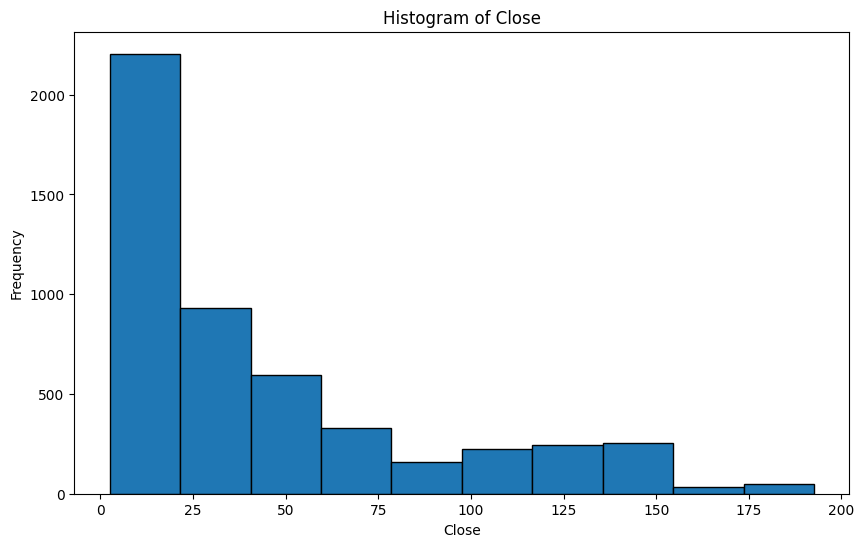

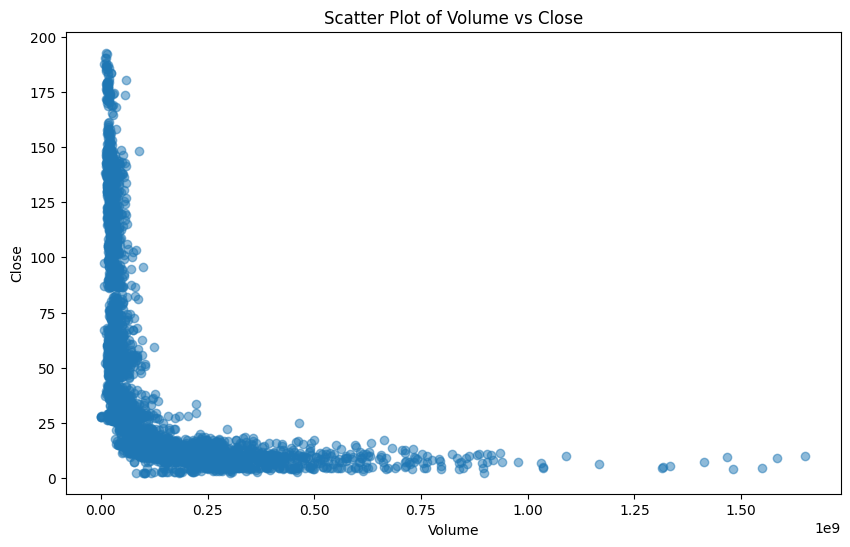

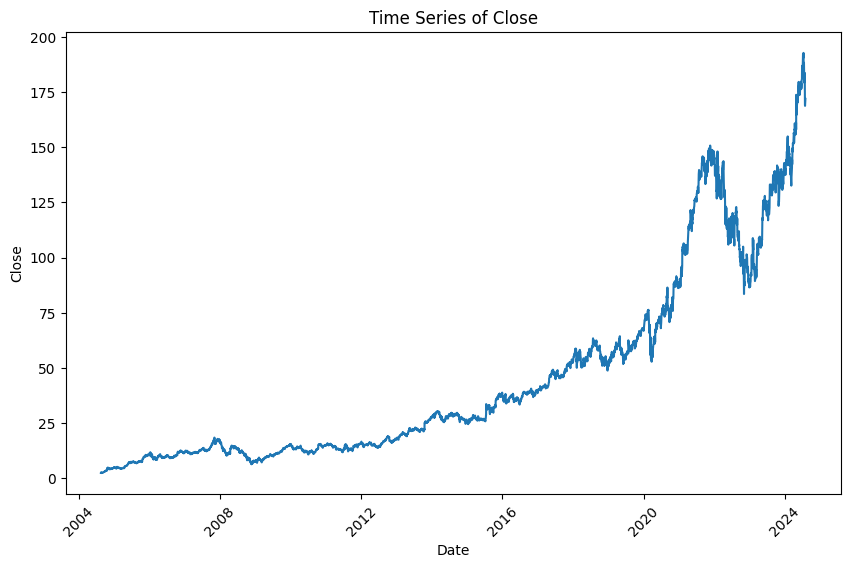

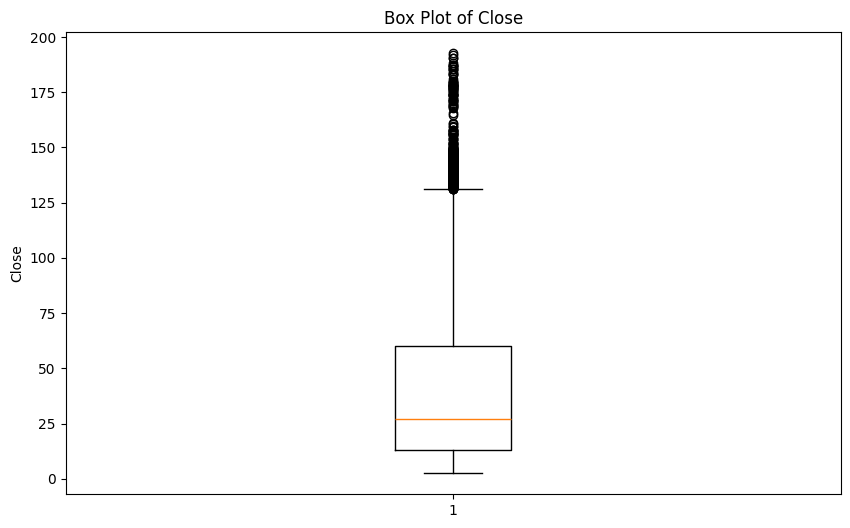

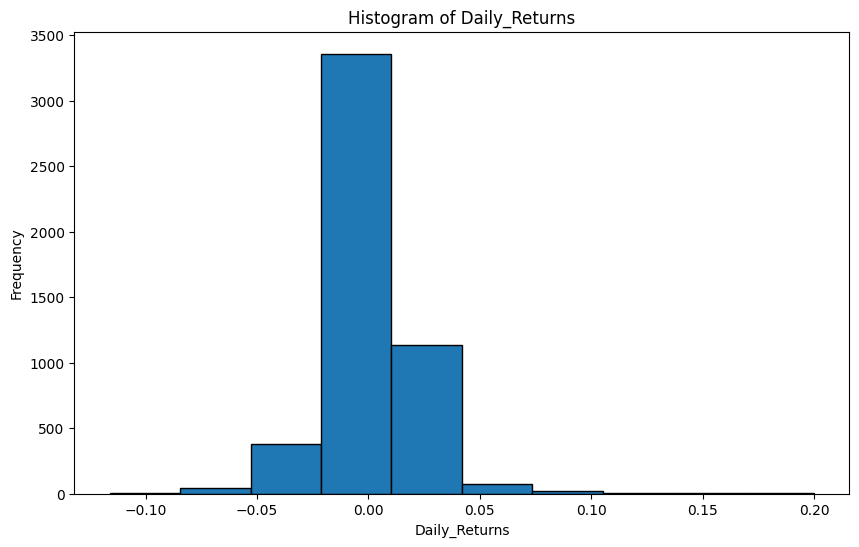

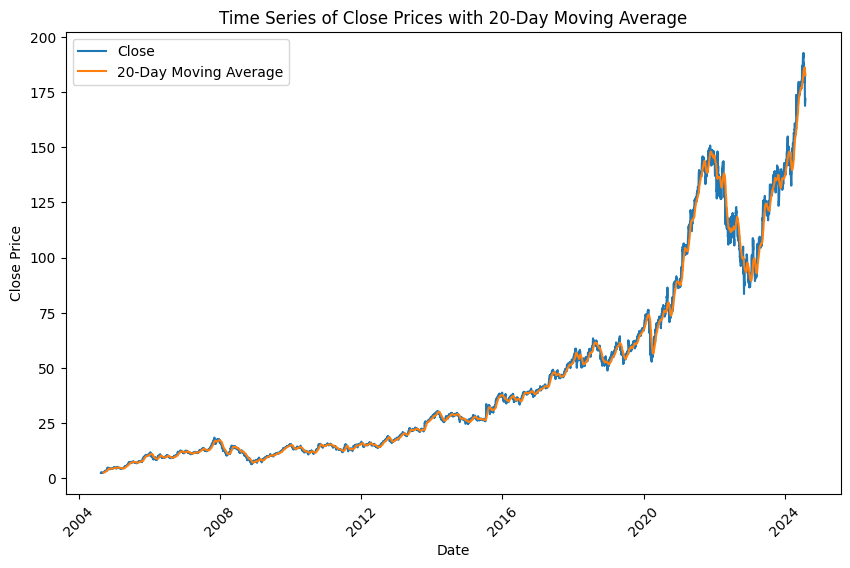

In [3]:

# Convert 'Date' column to datetime
data = convert_to_datetime(data, 'Date')

# Plot histogram of 'Close' prices
plot_histogram(data, 'Close')

# Plot scatter plot of 'Volume' vs 'Close'
plot_scatter(data, 'Volume', 'Close')

# Plot time series of 'Close' prices
plot_time_series(data, 'Date', 'Close')

# Plot box plot of 'Close' prices
plot_boxplot(data, 'Close')

# Calculate daily returns for the 'Close' column
data = calculate_daily_returns(data, 'Close')

# Plot histogram of daily returns
plot_histogram(data, 'Daily_Returns')

# Calculate 20-day moving average for the 'Close' column
data = calculate_moving_average(data, 'Close', 20)

# Plot time series of 'Close' prices with 20-day moving average
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close')
plt.plot(data['Date'], data['MA_20'], label='20-Day Moving Average')
plt.title('Time Series of Close Prices with 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()
